# The Iris Dataset - Clustering
This data sets consists of 3 different types of irises' (Setosa, Versicolour, and Virginica) petal and sepal length.

Data available at: 
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Assignment Requirements:
- Create KMeans clustering Juypter Notebook of a public dataset. 
- Create a faceted plot KMeans cluster of a public dataset, where each facet is a cluster(can use ggplot, seaborn or plotly)
- Demonstrate use of elbow method (as described in reading and lecture) in notebook
- Demonstrate use of silhouette plot as described in reading and lecture) in notebook

In [17]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
df = pd.read_csv(url, names=columns)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Clustering with KMeans
## Elbow Method
To quantify the quality of clustering, we need to use intrinsic metrics—such as the within-cluster SSE (distortion) to compare the performance of different k-means clusterings. Conveniently, we don't need to compute the within-cluster SSE explicitly when we are using scikit-learn, as it is already accessible via the inertia_ attribute after fitting a KMeans model.

In [26]:
# find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
x = df.iloc[:, 0:3].values
distortion = []

for i in range(1, 8):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    distortion.append(kmeans.inertia_)

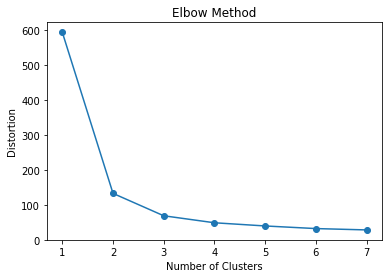

In [27]:
# visualize the result of elbow method
plt.plot(range(1,8), distortion, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

### The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (distortion) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

## Kmean Clustering

In [72]:
km = KMeans(n_clusters=3, init='k-means++')
irism = km.fit(x)

In [73]:
irism.cluster_centers_

array([[ 5.006     ,  3.418     ,  1.464     ],
       [ 5.84655172,  2.73275862,  4.3637931 ],
       [ 6.83571429,  3.06428571,  5.6547619 ]])

In [74]:
y_km = km.fit_predict(x)

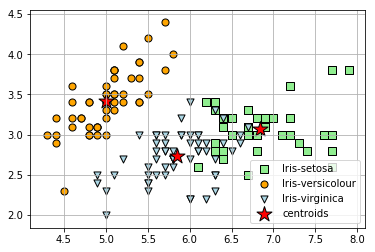

In [76]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*',c='red',edgecolor='black',label='centroids')
plt.legend()
plt.grid()
plt.show()

## Sihouette Plot
Sihouette analysis is an intrinsic metric to evaluate the quality of a clustering. It can be used as a graphical tool to plot a measure of how tightly grouped the samples in the clusters are. 

In [77]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

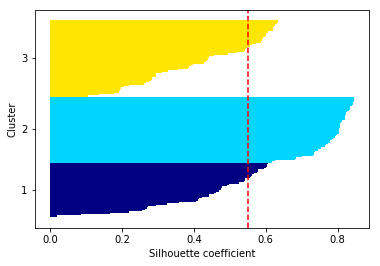

In [85]:
cluste_labels = np.unique(y_km)
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / 3)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.) 
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()